# Data analysis 2.0 
(Continued)

<br>
Qidu Fu
<br>
4/1/2025
<br>
<br>

**Contents**
- [1 Import libraries and load data](#1-import-libraries-and-load-data)
- [2 Conduct linguistic analysis](#2-conduct-linguistic-analysis)
    - [2.1 Tokenize data](#21-tokenize-data)
    - [2.2 Conduct statistical analysis](#22-conduct-statistical-tests)
        - [2.2.1 Get basic information](#221-get-basic-information)
        - [2.2.2 Get frequencies](#222-rq1-get-frequencies-across-six-topicsdomains)
        - [2.2.3 Conduct statistical test](#223-rq2-conduct-statistical-test-the-frequencies-across-six-topicsdomains)
        - [2.2.4 Conduct POS shift analysis](#224-rq3-conduct-pos-shift-analysis)
        - [2.2.5 Investigate topolect examples](#225-investigate-the-topolects)

## 1 Import libraries and load data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import stanza
import re

In [2]:
def read_stack_exchange_data(file_path='private/stack_exchange_topics.csv'):
    """
    Read the Stack Exchange data from a CSV file and return it as a DataFrame.
    """
    stack_df = pd.read_csv(file_path)
    return stack_df

# STACK_DF = read_stack_exchange_data()
# STACK_DF.head()

## 2 Conduct linguistic analysis

### 2.1 Tokenize data
- Get number of word tokens
- Get number of sentence tokens
- Get average word tokens per sentence
- Save the tokenized data through pickling

In [3]:
# !pip3 install stanza
# stanza.download('xx')
# stanza.download('en')
# stanza.download('zh')

In [4]:
# Initialize the Stanza pipelines for English and Chinese (with NER)
NLP_EN = stanza.Pipeline('en', processors='tokenize,mwt,pos,ner')
NLP_ZH = stanza.Pipeline('zh', processors='tokenize,pos,ner')  # Removed 'mwt'

# Function to detect whether the text is Chinese or English using regex
def detect_language(word):
    """
    Detect the language of a word based on whether it contains Chinese characters.
    """
    chinese_pattern = re.compile(r'[\u4e00-\u9fff]')
    if chinese_pattern.search(word):
        return 'zh'  # Chinese
    else:
        return 'en'  # English

# Function to get the number of tokens in a text
def get_num_tokens(doc):
    """
    Get the number of tokens in a text using Stanza.
    """
    return len([token.text for sentence in doc.sentences for token in sentence.tokens])

# Function to get the number of sentences in a text
def get_num_sentences(doc):
    """
    Get the number of sentences in a text using Stanza.
    """
    return len(doc.sentences)

# Function to get average token count per sentence
def get_avg_token_count_per_sentence(num_tokens, num_sentences):
    """
    Get the average number of tokens per sentence in a text using Stanza.
    """
    return num_tokens / num_sentences if num_sentences > 0 else 0

# Function to get word, sentence tokenizations, and NER (including POS tags for each token)
def get_word_and_sentence_tokenizations(doc):
    """
    Get the tokenization of words and sentences in a text using Stanza,
    along with POS tags for each token.
    """
    word_tokenization = [
        (token.text, token.words[0].xpos, [(ent.text, ent.type) for ent in sentence.ents]) 
        for sentence in doc.sentences for token in sentence.tokens
    ]
    sentence_tokenization = [sentence.text for sentence in doc.sentences]
    return word_tokenization, sentence_tokenization

# Function to apply tokenization, sentence and entity extraction
def apply_tokenization(text):
    """
    Apply tokenization to a text using Stanza.
    This function returns the word tokenization, sentence tokenization,
    number of tokens, number of sentences, average tokens per sentence,
    POS tags for each token, and named entity recognition results.
    """
    # Initialize results dictionary
    results = {}

    all_tokens = []
    total_tokens = 0
    total_sentences = 0

    # Use Stanza's built-in sentence segmentation for English and Chinese separately
    doc_en = NLP_EN(text)  # Using English Stanza pipeline for sentence segmentation, it works for mixed languages too
    doc_zh = NLP_ZH(text)  # Using Chinese Stanza pipeline for Chinese text segmentation

    # Set to track sentence segments and avoid over-counting
    seen_sentences = set()

    # Process the English part
    for sentence in doc_en.sentences:
        sentence_text = sentence.text.strip()
        if sentence_text not in seen_sentences:
            seen_sentences.add(sentence_text)
            word_tokenization, _ = get_word_and_sentence_tokenizations(doc_en)
            all_tokens.extend(word_tokenization)
            total_tokens += get_num_tokens(doc_en)
            total_sentences += 1

    # Process the Chinese part
    for sentence in doc_zh.sentences:
        sentence_text = sentence.text.strip()
        if sentence_text not in seen_sentences:
            seen_sentences.add(sentence_text)
            word_tokenization, _ = get_word_and_sentence_tokenizations(doc_zh)
            all_tokens.extend(word_tokenization)
            total_tokens += get_num_tokens(doc_zh)
            total_sentences += 1

    # Calculate average tokens per sentence
    avg_tokens_per_sentence = get_avg_token_count_per_sentence(total_tokens, total_sentences)

    # Final result
    final_results = {
        'all_tokens': all_tokens,  # Tokens with POS and NER as a tuple
        'total_word_count': total_tokens,
        'total_sentence_count': total_sentences,
        'average_words_per_sentence': avg_tokens_per_sentence
    }

    return final_results



2025-04-15 16:07:20 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-04-15 16:07:20 INFO: Downloaded file to /Users/qidufu/stanza_resources/resources.json
2025-04-15 16:07:21 INFO: Loading these models for language: en (English):
| Processor | Package                   |
-----------------------------------------
| tokenize  | combined                  |
| mwt       | combined                  |
| pos       | combined_charlm           |
| ner       | ontonotes-ww-multi_charlm |

2025-04-15 16:07:21 INFO: Using device: cpu
2025-04-15 16:07:21 INFO: Loading: tokenize
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
2025-04-15 16:07:21 INFO: Loading: mwt
2025-04-15 16:07:21 IN

2025-04-15 16:07:24 INFO: Downloaded file to /Users/qidufu/stanza_resources/resources.json
2025-04-15 16:07:24 INFO: "zh" is an alias for "zh-hans"
2025-04-15 16:07:25 INFO: Loading these models for language: zh-hans (Simplified_Chinese):
| Processor | Package        |
------------------------------
| tokenize  | gsdsimp        |
| pos       | gsdsimp_charlm |
| ner       | ontonotes      |

2025-04-15 16:07:25 INFO: Using device: cpu
2025-04-15 16:07:25 INFO: Loading: tokenize
2025-04-15 16:07:26 INFO: Loading: pos
2025-04-15 16:07:27 INFO: Loading: ner
2025-04-15 16:07:30 INFO: Done loading processors!


In [5]:
# STACK_DF_TEST = STACK_DF.sample(10, random_state=0)

# # Apply the tokenization function to the 'text' column of the DataFrame
# STACK_DF_TEST[['all_tokens', 'total_word_count', 'total_sentence_count', 'average_words_per_sentence']] = \
#     STACK_DF_TEST['text'].apply(lambda x: pd.Series(apply_tokenization(x)))

# STACK_DF_TEST.head()



In [6]:
# Apply the tokenization function to the entire DataFrame
# STACK_DF[['all_tokens', 'total_word_count', 'total_sentence_count', 'average_words_per_sentence']] = \
#     STACK_DF['text'].apply(lambda x: pd.Series(apply_tokenization(x)))
# STACK_DF.head()


In [7]:
# # # Save the DF through pickle
# STACK_DF.to_pickle('private/stack_exchange_tokenized.pkl')
# print('File saved as private/stack_exchange_tokenized.pkl')

### 2.2 Conduct statistical tests

#### 2.2.1 Get basic information
- have 12,041 records/rows withou null values
- have a total word tokens of 152573
- have a total sentence counts of 13664
- have a mean word count of 10.54 per sentence

In [8]:
# Load the DataFrame from pickle
STACK_DF = pd.read_pickle('../private/stack_exchange_tokenized.pkl')
STACK_DF.head()

,text,code_switching,topic,topic_idx,topic_lda,all_tokens,total_word_count,total_sentence_count,average_words_per_sentence
0,My translation of Li Bai's 《三五七言》,True,"translation, poetry",0,"word choice, phrase, sentence structure","[(My, PRP$, []), (translation, NN, []), (of, I...",9,1,9.000000
1,What do these characters on an antique mural p...,False,"character identification, traditional characte...",3,"Mandarin, character","[(What, WP, []), (do, VBP, []), (these, DT, []...",71,3,23.666667
2,Help in translating Li Bai's 《月下独酌·其二》,True,"translation, poetry",0,"word choice, phrase, sentence structure","[(Help, VB, [(""Li Bai's"", 'PERSON')]), (in, IN...",9,1,9.000000
3,purpose of using 了 with 要不,True,grammar,5,"difference: writing, speech","[(purpose, NN, []), (of, IN, []), (using, VBG,...",6,1,6.000000
4,Why does the character 的 is pronounced differe...,True,"pronunciation, songs",4,"characters, synonyms, topolects","[(Why, WRB, []), (does, VBZ, []), (the, DT, []...",14,1,14.000000


In [9]:
STACK_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12041 entries, 0 to 12040
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   text                        12041 non-null  object 
 1   code_switching              12041 non-null  bool   
 2   topic                       12041 non-null  object 
 3   topic_idx                   12041 non-null  int64  
 4   topic_lda                   12041 non-null  object 
 5   all_tokens                  12041 non-null  object 
 6   total_word_count            12041 non-null  int64  
 7   total_sentence_count        12041 non-null  int64  
 8   average_words_per_sentence  12041 non-null  float64
dtypes: bool(1), float64(1), int64(3), object(4)
memory usage: 764.4+ KB


In [10]:
# Check for missing values
print("Missing values in the DataFrame:")
STACK_DF.isna().sum()

Missing values in the DataFrame:


text                          0
code_switching                0
topic                         0
topic_idx                     0
topic_lda                     0
all_tokens                    0
total_word_count              0
total_sentence_count          0
average_words_per_sentence    0
dtype: int64

In [11]:
# Total word count
print('The total word count is:', STACK_DF['total_word_count'].sum())
print('-' * 50)
# Total sentence count
print('The total sentence count is:', STACK_DF['total_sentence_count'].sum())
print('-' * 50)
# Average words per sentence
print('The average words per sentence is:', 
        round(STACK_DF['average_words_per_sentence'].mean(), 2))
print('-' * 50)

The total word count is: 152573
--------------------------------------------------
The total sentence count is: 13664
--------------------------------------------------
The average words per sentence is: 10.54
--------------------------------------------------


#### 2.2.2 RQ1: Get frequencies across six topics/domains
- The 6 topics have not significant differences in cs frequencies based on the kruskal-wallis test with p = 0.415
- Topic VS cs frequency count
    - 1) characters, synonyms, topolects            2437
    - 2) word choice, phrase, sentence structure    2033
    - 3) idioms                                     1012
    - 4) Mandarin, character                         840
    - 5) grammar, meaning                            652
    - 6) difference: writing, speech                 483

<AxesSubplot: xlabel='topic_lda,code_switching'>

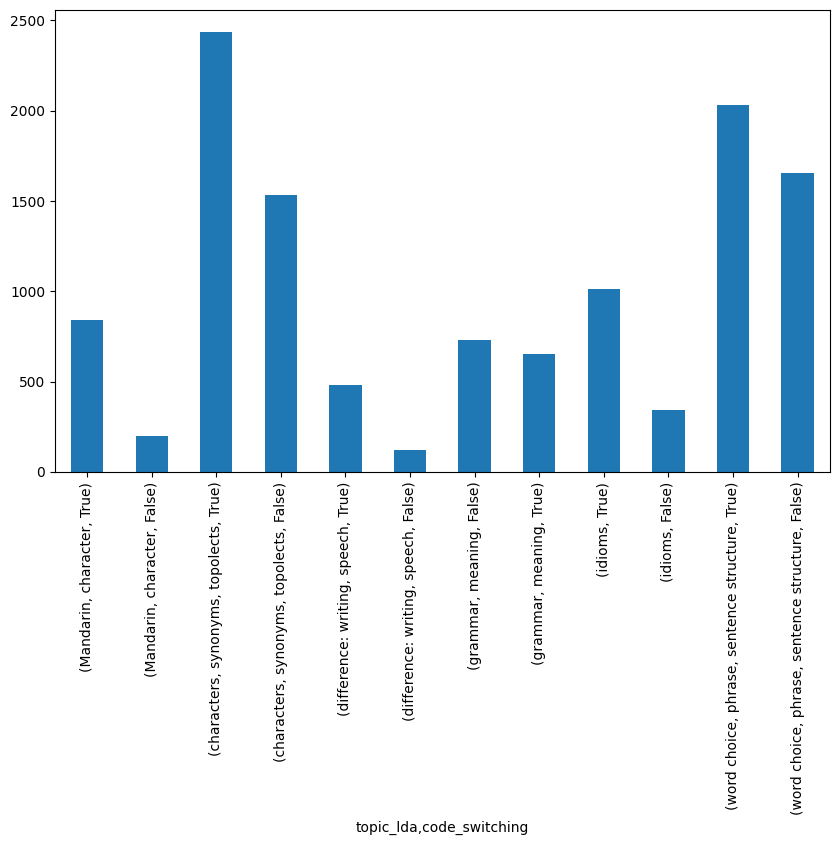

In [12]:
STACK_DF.groupby('topic_lda').code_switching.value_counts().plot(kind='bar', 
                                    orientation='vertical', figsize=(10, 6))

In [13]:
# Only sum these when the code_switching is True
CS_COUNTS_PER_TOPIC = (STACK_DF[STACK_DF['code_switching'] == True]
                        .groupby('topic_lda').size().sort_values(ascending=False))
print('type: ', type(CS_COUNTS_PER_TOPIC))
print('CS_COUNTS_PER_TOPIC')
CS_COUNTS_PER_TOPIC

type:  <class 'pandas.core.series.Series'>
CS_COUNTS_PER_TOPIC


topic_lda
characters, synonyms, topolects            2437
word choice, phrase, sentence structure    2033
idioms                                     1012
Mandarin, character                         840
grammar, meaning                            652
difference: writing, speech                 483
dtype: int64

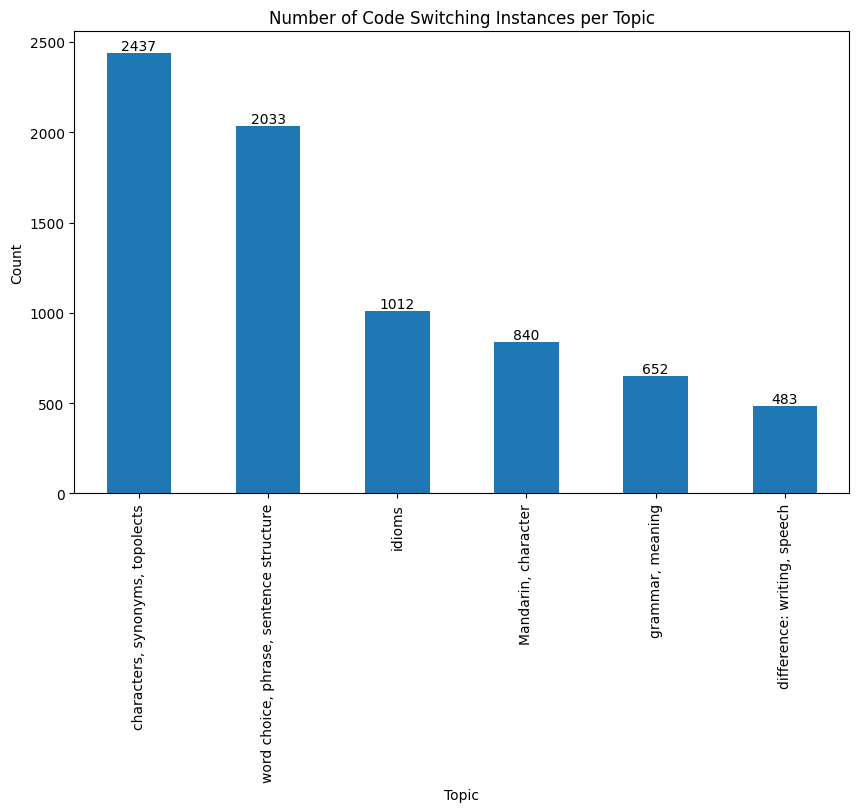

In [14]:
def plot_code_switching_counts():
    """
    Plot the number of code switching instances per topic.
    """
    CS_COUNTS_PER_TOPIC.plot(kind='bar', 
                            figsize=(10, 6),
                            title='Number of Code Switching Instances per Topic')
    # add numbers on top of the bars
    for i, v in enumerate(CS_COUNTS_PER_TOPIC):
        plt.text(i, v + 0.5, str(v), ha='center', va='bottom')
    plt.xlabel('Topic')
    plt.ylabel('Count')
    # save the plot
    plt.savefig('../images/code_switching_counts_per_topic.png')
plot_code_switching_counts()

#### 2.2.3 RQ2: Conduct statistical test the frequencies across six topics/domains
- stats, p_value: 5.0, 0.415
- The groups are not statistically different

In [15]:
import scipy.stats as stats

# Function to test for normality
def perform_shapiro_test(counts_per_topic):
    """
    Perform the Shapiro-Wilk test for normality on the given counts per topic.
    
    The input should be a pandas Series where the index is 'topic_lda' 
    and the values are frequency counts (e.g., the number of code switching instances).
    """
    # Perform the Shapiro-Wilk test
    stat, p_value = stats.shapiro(counts_per_topic)

    # Display the result
    if p_value > 0.05:
        print('The data is normally distributed')
    else:
        print('The data is not normally distributed')
    return stat, p_value
perform_shapiro_test(CS_COUNTS_PER_TOPIC)

The data is normally distributed


(0.8623561859130859, 0.1973973512649536)

In [16]:
# Function to perform the kruskal-wallis test
def perform_kruskal_wallis_test(counts_per_topic):
    """
    Perform the Kruskal-Wallis test on the given counts per topic.
    
    The input should be a pandas Series where the index is 'topic_lda' 
    and the values are frequency counts (e.g., the number of code switching instances).
    """
    # Perform the Kruskal-Wallis test
    stat, p_value = stats.kruskal(*[group for name, group in counts_per_topic.groupby(level=0)])

    # Display the result
    if p_value < 0.05:
        print('The groups are statistically different')
    else:
        print('The groups are not statistically different')
    return stat, p_value
print('stats, p_value')
perform_kruskal_wallis_test(CS_COUNTS_PER_TOPIC)

stats, p_value
The groups are not statistically different


(5.0, 0.4158801869955079)

#### 2.2.4 RQ3: Conduct POS shift analysis
- no_shift    139302
- shift        13271

In [17]:
# Function to analyze POS shifts in mixed-language sentences
def analyze_pos_shift(tokens):
    """
    Analyze POS shifts in a mixed-language sentence where Chinese words are embedded in English sentences.
    This function compares the POS of Chinese and English words to check for any POS shifts.
    """
    pos_analysis = []

    # Process each token in the sentence (each token is a tuple: (TOKEN, POS, NER))
    for token, pos, ner in tokens:
        # Detect if the token is Chinese or English
        language = 'zh' if any('\u4e00' <= char <= '\u9fff' for char in token) else 'en'

        # For Chinese tokens, check if they are shifting POS
        if language == 'zh':
            # Example: Checking if Chinese nouns or verbs appear in unexpected positions
            # Here we assume Chinese nouns should act like English nouns, verbs like English verbs
            pos_shift = 'shift' if pos not in ['NN', 'VB', 'JJ'] else 'no_shift'
        else:
            # For English tokens, assume no shift unless it's a Chinese word embedded in English
            pos_shift = 'no_shift'

        pos_analysis.append((token, pos, ner, language, pos_shift))

    # Convert the analysis into a DataFrame for easier analysis
    df_pos = pd.DataFrame(pos_analysis, columns=['token', 'POS', 'NER', 'language', 'pos_shift'])
    
    return df_pos

# Apply the POS shift analysis to the 'all_tokens' column in the DataFrame
POS_DF = STACK_DF['all_tokens'].apply(lambda x: analyze_pos_shift(x))

# Concatenate the list of DataFrames into a single DataFrame
POS_DF_FINAL = pd.concat(POS_DF.tolist(), ignore_index=True)

POS_DF_FINAL.head()


,token,POS,NER,language,pos_shift
0,My,PRP$,[],en,no_shift
1,translation,NN,[],en,no_shift
2,of,IN,[],en,no_shift
3,Li,NNP,[],en,no_shift
4,Bai's,NNP,[],en,no_shift


In [18]:
POS_DF_FINAL.head(10)

,token,POS,NER,language,pos_shift
0,My,PRP$,[],en,no_shift
1,translation,NN,[],en,no_shift
2,of,IN,[],en,no_shift
3,Li,NNP,[],en,no_shift
4,Bai's,NNP,[],en,no_shift
5,《,``,[],en,no_shift
6,三五七,NN,[],zh,no_shift
7,言,'',[],zh,shift
8,》,'',[],en,no_shift
9,What,WP,[],en,no_shift


In [19]:
import matplotlib.pyplot as plt
import os

def plot_pos_shift_analysis(df, save_path='images/pos_shift_analysis.png'):
    """
    This function generates a bar chart for POS shift analysis and saves the figure to the specified path.
    
    Parameters:
    - df: The DataFrame containing the 'pos_shift' column.
    - save_path: The path to save the image. Default is 'images/pos_shift_analysis.png'.
    
    Returns:
    - The path to the saved image.
    """
    # Ensure the 'images' directory exists
    os.makedirs(os.path.dirname(save_path), exist_ok=True)

    # Plotting the word counts for POS shift analysis
    ax = df['pos_shift'].value_counts().plot(kind='bar', figsize=(10, 6), 
                                              title='POS Shift Analysis')

    # Add labels to the chart for better clarity
    plt.xlabel('POS Shift Status')
    plt.ylabel('Word Count')
    plt.xticks(rotation=0)  # Make sure the x-axis labels are not rotated

    # Save the figure to the specified path
    plt.savefig(save_path)

    # Close the plot to avoid display in Jupyter notebooks (optional)
    plt.close()

    return save_path

image_path = plot_pos_shift_analysis(POS_DF_FINAL, save_path='../images/pos_shift_analysis.png')
print(f'Chart saved to: {image_path}')



Chart saved to: ../images/pos_shift_analysis.png


In [20]:
POS_DF_FINAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152573 entries, 0 to 152572
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   token      152573 non-null  object
 1   POS        152573 non-null  object
 2   NER        152573 non-null  object
 3   language   152573 non-null  object
 4   pos_shift  152573 non-null  object
dtypes: object(5)
memory usage: 5.8+ MB


In [21]:
# Save the pos df to pickle
# POS_DF_FINAL.to_pickle('../private/stack_exchange_pos_shift.pkl')
# print('File saved as private/stack_exchange_pos_shift.pkl')

In [22]:
POS_DF_FINAL = pd.read_pickle('../private/stack_exchange_pos_shift.pkl')
POS_DF_FINAL.head()

,token,POS,NER,language,pos_shift
0,My,PRP$,[],en,no_shift
1,translation,NN,[],en,no_shift
2,of,IN,[],en,no_shift
3,Li,NNP,[],en,no_shift
4,Bai's,NNP,[],en,no_shift


In [23]:
POS_DF_FINAL.query('pos_shift == "shift"').sample(10)

,token,POS,NER,language,pos_shift
31015,题,",",[],zh,shift
69991,善于,NNS,[],zh,shift
149804,我没有,VV,[],zh,shift
83123,捅,VV,[],zh,shift
109195,要不不留学要留学就要留出个性,NNP,[],zh,shift
32068,折腾,PRP,[],zh,shift
129039,(吗,FW,[],zh,shift
77900,业务,RB,[],zh,shift
82277,...在服装配饰、护理美容、消费电子及家居家装这四大领域的产品上,NNP,[],zh,shift
82587,了,UH,"[(今天, DATE)]",zh,shift


#### 2.2.5 Investigate the topolects

In [24]:
STACK_DF = pd.read_csv('../private/stack_exchange_topics.csv')
STACK_DF.sample(10, random_state=0)

,text,code_switching,topic,topic_idx,topic_lda
5360,Is mapping from simplified to traditional char...,False,"traditional vs simplified, ambiguity",2,"grammar, meaning"
10722,Translation: Regard your neighbor’s gain as yo...,False,translation,4,"characters, synonyms, topolects"
7127,How to write Chinese fluently?,False,"writing, handwriting, calligraphy",1,idioms
3355,Why don't people use 專名號 to avoid ambiguity?,True,punctuation,0,"word choice, phrase, sentence structure"
4171,How to pronounce '蒙古' correctly?,True,"pronunciation, sandhi",2,"grammar, meaning"
6123,Etymology behind the phrase 恭喜发财 (Kung Hei Fat...,True,"usage, etymology, chinese new year",2,"grammar, meaning"
2105,Can the phrase 地铁 in Chinese taken to mean the...,True,difference,1,idioms
10714,How do you ask how old a building is?,False,"grammar, usage",1,idioms
9665,"沒地X, what is the third character?",True,"characters, character identification, culture",3,"Mandarin, character"
2689,What were the court/administrative languages o...,False,"topolect, history",0,"word choice, phrase, sentence structure"


In [25]:
STACK_DF.iloc[:, [0, 1, 3, 4]].sample(10, random_state=0)

,text,code_switching,topic_idx,topic_lda
5360,Is mapping from simplified to traditional char...,False,2,"grammar, meaning"
10722,Translation: Regard your neighbor’s gain as yo...,False,4,"characters, synonyms, topolects"
7127,How to write Chinese fluently?,False,1,idioms
3355,Why don't people use 專名號 to avoid ambiguity?,True,0,"word choice, phrase, sentence structure"
4171,How to pronounce '蒙古' correctly?,True,2,"grammar, meaning"
6123,Etymology behind the phrase 恭喜发财 (Kung Hei Fat...,True,2,"grammar, meaning"
2105,Can the phrase 地铁 in Chinese taken to mean the...,True,1,idioms
10714,How do you ask how old a building is?,False,1,idioms
9665,"沒地X, what is the third character?",True,3,"Mandarin, character"
2689,What were the court/administrative languages o...,False,0,"word choice, phrase, sentence structure"


In [26]:
# examine the topic_idx = 4 for topolect examples
STACK_DF.query('topic_idx == 4').sample(10, random_state=0)

,text,code_switching,topic,topic_idx,topic_lda
11328,NY Times 翻译: He presented the choice in binary...,True,translation,4,"characters, synonyms, topolects"
917,"Meaning of the ""雨菽"" phrase in 明史",True,"translation, classical chinese",4,"characters, synonyms, topolects"
5406,比较你们国家和中国对颜色、数字的看法: How can I compare two coun...,True,"translation, meaning",4,"characters, synonyms, topolects"
1826,Translating 道可道非恆道 from the Tao Te Ching: Part 2,True,translation,4,"characters, synonyms, topolects"
10994,Help translating 爱人跟人走,True,"translation, topolect, poetry",4,"characters, synonyms, topolects"
11350,"The Chinese of ""Browse Teachers"" : 访问老师？",True,translation,4,"characters, synonyms, topolects"
11434,translate: Today I worked through 2 chapters o...,False,translation,4,"characters, synonyms, topolects"
9926,Does anyone know the translation of this chara...,False,translation,4,"characters, synonyms, topolects"
10800,What grammatical elements are contained in the...,True,"translation, grammar",4,"characters, synonyms, topolects"
7756,Taiwanese brand of computers called 嘉馬電腦,True,"translation, topolect",4,"characters, synonyms, topolects"


In [27]:
# examine the topic_idx = 4 and topic includes topolect for topolect examples
topolect_examples = STACK_DF[   (STACK_DF['topic_idx'] == 4) & 
                                (STACK_DF['topic'].str.contains('topolect'))]
topolect_examples


,text,code_switching,topic,topic_idx,topic_lda
345,Transliteration issues vis-à-vis topolect?,False,"translation, topolect, transliteration",4,"characters, synonyms, topolects"
1916,Reverse Translation: “The Devil’s own uncle kn...,False,"translation, topolect",4,"characters, synonyms, topolects"
2470,Help understanding the Min song 追追追,True,"translation, topolect, hokkien, songs",4,"characters, synonyms, topolects"
5672,Help translating two lines of Zhang Shaolin's ...,True,"translation, pronunciation, topolect, spelling...",4,"characters, synonyms, topolects"
6941,What is a Singapore Sling drink known as in th...,False,"translation, topolect",4,"characters, synonyms, topolects"
7613,About a (Southern Sixian?) Hakka folk song fou...,False,"translation, topolect, hakka",4,"characters, synonyms, topolects"
7756,Taiwanese brand of computers called 嘉馬電腦,True,"translation, topolect",4,"characters, synonyms, topolects"
8224,About the last non-repeated sentence in 爱人是行船人,True,"translation, topolect, hokkien",4,"characters, synonyms, topolects"
8242,Two questions on a sentence in a Min song,False,"translation, topolect, transliteration, hokkien",4,"characters, synonyms, topolects"
8627,"Min Nan expressions: spelling, meaning and pro...",False,"translation, topolect",4,"characters, synonyms, topolects"


In [28]:
topolect_examples.shape

(20, 5)

In [29]:
# function to print out the topolect examples
def print_topolect_example(df):
    """
    Print out the topolect examples from the DataFrame.
    
    Parameters:
    - df: The DataFrame containing the examples.
    """
    for index, row in df.iterrows():
        print(f"Text: {row['text']}")
        print('-' * 50)
print('print the 1st 5 topolect examples')
print_topolect_example(topolect_examples.iloc[:5, :])

print the 1st 5 topolect examples
Text: Transliteration issues vis-à-vis topolect?
--------------------------------------------------
Text: Reverse Translation: “The Devil’s own uncle knows!“
--------------------------------------------------
Text: Help understanding the Min song 追追追
--------------------------------------------------
Text: Help translating two lines of Zhang Shaolin's "Hakka homesickness" (客家乡情) + some weird pronunciations in that song
--------------------------------------------------
Text: What is a Singapore Sling drink known as in the Chinese dialects of Singapore?
--------------------------------------------------


In [30]:
print('print the 2nd 5 topolect examples')
print_topolect_example(topolect_examples.iloc[5:10, :])

print the 2nd 5 topolect examples
Text: About a (Southern Sixian?) Hakka folk song found on Youtube
--------------------------------------------------
Text: Taiwanese brand of computers called 嘉馬電腦
--------------------------------------------------
Text: About the last non-repeated sentence in 爱人是行船人
--------------------------------------------------
Text: Two questions on a sentence in a Min song
--------------------------------------------------
Text: Min Nan expressions: spelling, meaning and pronunciation?
--------------------------------------------------


In [31]:
print('print the 3rd 5 topolect examples')
print_topolect_example(topolect_examples.iloc[10:15, :])

print the 3rd 5 topolect examples
Text: What verb is the 捏 in the Min sentence 将你捏絚絚?
--------------------------------------------------
Text: Hakka song: problem translating a bit
--------------------------------------------------
Text: What does "liam" mean in this song's lyrics?
--------------------------------------------------
Text: What's the Mandarin equivalent of 埋 in Cantonese?
--------------------------------------------------
Text: Help translating 海南鸡饭 - 3
--------------------------------------------------


In [32]:
print('print the rest topolect examples')
print_topolect_example(topolect_examples.iloc[15:, :])

print the rest topolect examples
Text: Help translating 海南鸡饭 - 2
--------------------------------------------------
Text: Help translating 海南鸡饭
--------------------------------------------------
Text: Mandarin Equivalent: 屙尿都屙不伸?
--------------------------------------------------
Text: Help translating 爱人跟人走
--------------------------------------------------
Text: (Better) Translations of: 稀罕/稀奇?
--------------------------------------------------
